In [2]:
from google.colab import files
uploaded = files.upload()

Saving crime_data (2).csv to crime_data (2).csv


In [4]:
import pandas as pd
files = pd.read_csv('crime_data (2).csv')
files.head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
files.rename(columns={'Unnamed: 0':'State'},inplace = 'True')
files.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters formed by Hierarchical Clustering: 3
Number of clusters formed by K-Means Clustering: 3
Number of clusters formed by DBSCAN Clustering: 1


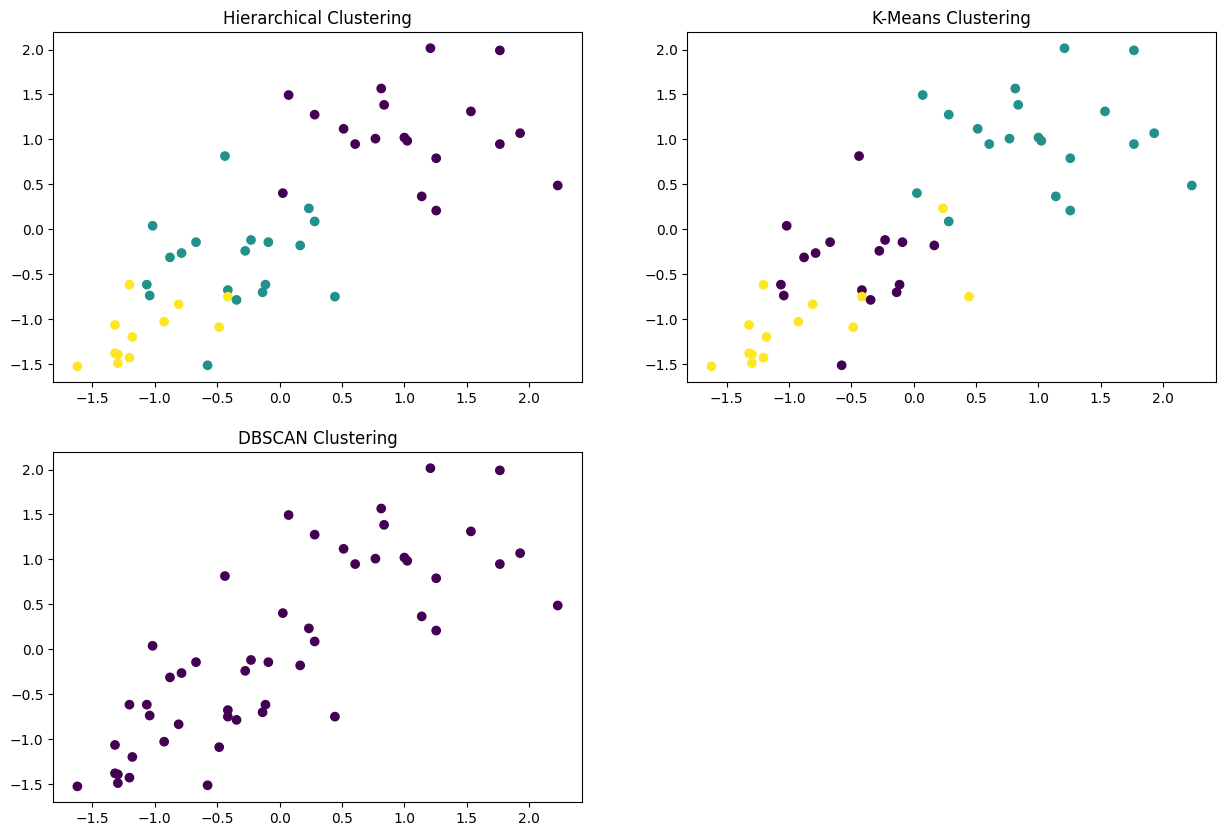

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_data = scaler.fit_transform(files.iloc[:, 1:])

# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="ward")
labels_hc = hc.fit_predict(scaled_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels_km = kmeans.fit_predict(scaled_data)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels_db = dbscan.fit_predict(scaled_data)

# Print the number of clusters formed by each algorithm
print("Number of clusters formed by Hierarchical Clustering:", len(set(labels_hc)))
print("Number of clusters formed by K-Means Clustering:", len(set(labels_km)))
print("Number of clusters formed by DBSCAN Clustering:", len(set(labels_db)))

# Visualize the clusters
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_hc, cmap="viridis")
plt.title("Hierarchical Clustering")

plt.subplot(2, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_km, cmap="viridis")
plt.title("K-Means Clustering")

plt.subplot(2, 2, 3)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_db, cmap="viridis")
plt.title("DBSCAN Clustering")

plt.show()




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of clusters formed by Complete Linkage: 3
Number of clusters formed by Single Linkage: 3


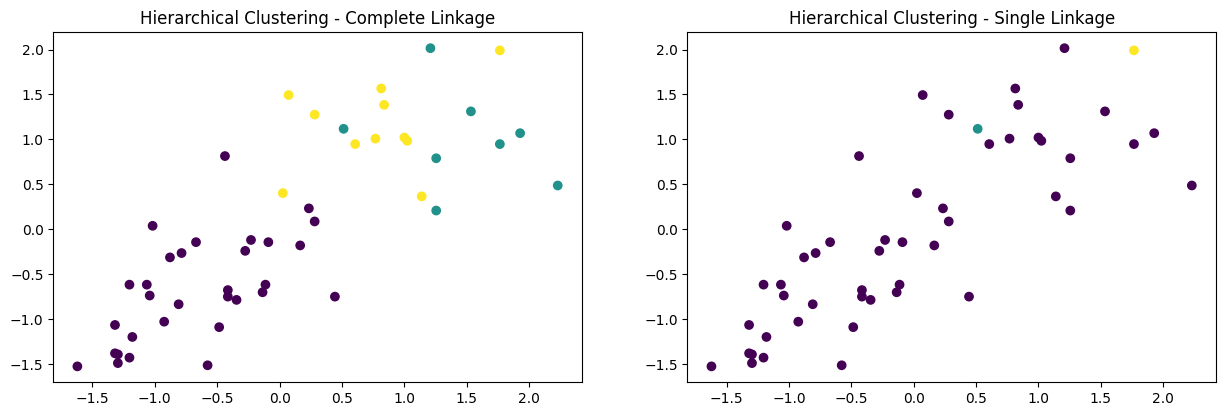

In [15]:


import matplotlib.pyplot as plt
# Hierarchical Clustering for complete linkage
hc_complete = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete")
labels_hc_complete = hc_complete.fit_predict(scaled_data)

# Hierarchical Clustering for single linkage
hc_single = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="single")
labels_hc_single = hc_single.fit_predict(scaled_data)

# Print the number of clusters formed by each linkage
print("Number of clusters formed by Complete Linkage:", len(set(labels_hc_complete)))
print("Number of clusters formed by Single Linkage:", len(set(labels_hc_single)))

# Visualize the clusters for complete and single linkage
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_hc_complete, cmap="viridis")
plt.title("Hierarchical Clustering - Complete Linkage")

plt.subplot(2, 2, 2)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_hc_single, cmap="viridis")
plt.title("Hierarchical Clustering - Single Linkage")

plt.show()
